In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\fahiy\Documents\Springboard\Capstone\Unit-6\Unit-6-Step5\step5_output.csv')


In [3]:
dfo=df.select_dtypes(include=['object'])

In [4]:
from  sklearn import preprocessing

# Dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Unnamed: 0','Name','AdultWeekend'], axis=1)
X =  X.drop(X.loc[:,'Alaska':'Wyoming'],axis=1)
X =  X.drop(['summit_elev'],axis=1)
print(X.columns)
# Declare a response variable y, and assign it the AdultWeekend column of the df 
y = df['AdultWeekend']

scaler1 = preprocessing.StandardScaler().fit(X)
X_scaled=scaler1.transform(X)

Index(['vertical_drop', 'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad',
       'triple', 'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'projectedDaysOpen', 'NightSkiing_ac', 'clusters'],
      dtype='object')


In [5]:
from sklearn.model_selection import train_test_split
y = y.ravel()
print(y)
X_train, X_test, y_train,y_test= train_test_split(X_scaled, y, test_size=0.25, random_state=1)

[53.         34.         78.         47.         64.16681004 78.
 75.         64.16681004 59.         84.         69.         83.
 64.16681004 79.         50.         69.         89.         56.
 84.         65.         65.         60.         55.         62.
 42.         47.         32.         47.         64.16681004 55.
 35.         40.         45.         52.         40.         43.
 55.         49.         32.         75.         79.         68.
 40.         64.16681004 65.         49.         49.         64.16681004
 49.         34.         45.         45.         45.         42.
 50.         64.16681004 45.         47.         44.         37.
 58.         35.34       48.         59.         47.         47.
 39.         20.         70.         89.         59.         64.16681004
 50.         58.         93.         72.         93.         45.
 89.         77.         20.         49.         55.         47.
 80.         76.         69.         63.2        42.         75.
 59.     

In [6]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [7]:
y_pred=model.predict(X_test)
y_pred

array([62.4610836 , 68.15091161, 60.85475399, 47.71208383, 46.85321327,
       78.40575189, 49.2871228 , 50.09700543, 46.87932568, 36.14964304,
       63.88118142, 88.10821277, 47.89139108, 62.99244027, 67.45630645,
       75.76508693, 45.74828243, 77.16665128, 63.0531197 , 58.56273716,
       53.8562502 , 44.67149419, 44.59456193, 56.60498882, 59.74478564,
       89.92998884, 47.25945331, 34.62238288, 58.00945522, 51.95885222,
       54.49652115, 55.21545871, 41.61397614, 63.95417085, 76.31460727,
       34.42976262, 47.48376174, 71.0166162 , 61.72308849, 53.21111785])

In [8]:
from sklearn.metrics import  explained_variance_score
from sklearn.metrics import  mean_absolute_error
print(explained_variance_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.7552845317680053
6.183673158073195


In [9]:
y_pred = model.predict(X_test)
print(y_pred)

[62.4610836  68.15091161 60.85475399 47.71208383 46.85321327 78.40575189
 49.2871228  50.09700543 46.87932568 36.14964304 63.88118142 88.10821277
 47.89139108 62.99244027 67.45630645 75.76508693 45.74828243 77.16665128
 63.0531197  58.56273716 53.8562502  44.67149419 44.59456193 56.60498882
 59.74478564 89.92998884 47.25945331 34.62238288 58.00945522 51.95885222
 54.49652115 55.21545871 41.61397614 63.95417085 76.31460727 34.42976262
 47.48376174 71.0166162  61.72308849 53.21111785]


In [10]:
dfc = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])

In [11]:
lm.intercept_

57.8284263658771

We actually took a random resort in Montana since Big Mountain Resort was not present in the dataset and renamed it "Big Mountain Resort"


In [14]:
df_big=df[df['Name'].str.contains('Big Mountain')]

df_big=df_big.drop(['Unnamed: 0'], axis=1)
df_big

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
65,Big Mountain Resort,8200,1400,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_big['AdultWeekend']

65    47.0
Name: AdultWeekend, dtype: float64

In [16]:
X['AdultWeekday']=110

In [17]:
X['daysOpenLastYear']=300

In [18]:
X['projectedDaysOpen']=180

In [19]:
from  sklearn import preprocessing
# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler2 =preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler1.transform(X) 
print(X_scaled)


[[ 1.20199106  0.          0.         ...  2.63805242 -0.91438332
  -1.64622371]
 [-0.97404469  0.          0.         ...  2.63805242 -0.29754782
  -0.1258877 ]
 [ 1.65605952  0.          0.         ...  2.63805242  0.73051133
   1.39444832]
 ...
 [-0.36978436  0.          0.         ...  2.63805242 -0.91438332
   1.39444832]
 [-0.07289345  0.          0.         ...  2.63805242 -0.91438332
   1.39444832]
 [ 1.25613     0.          0.         ...  2.63805242  1.34734683
   1.39444832]]


In [21]:
#y_pred=model.predict(X_scaled)
model.predict(X_scaled)

array([100.60826639,  95.12794444, 100.66307899,  93.46295112,
        99.61636921,  99.40600907,  91.55849422,  94.94308067,
        96.78649162, 105.32222546,  97.69622319,  98.2734784 ,
       105.9687773 , 106.10970968,  90.89392942,  93.41337288,
        92.40631201,  93.22774111,  91.76325001,  94.82985837,
       102.8137862 ,  98.84398085,  99.8014637 , 101.01797356,
        96.05965248, 102.03619633,  91.45551451,  97.98359411,
        92.29649033, 107.34232029,  98.40195673,  97.04685311,
       100.88056397, 104.62901504,  96.57086144, 100.47622042,
        95.34777247,  95.87350403,  94.80161636, 107.39027723,
       114.09770055, 106.0399516 ,  96.81564635,  95.30986409,
        94.59246097, 102.72987705,  99.71228426,  98.36025971,
        97.16165141,  94.05260606, 103.50656775,  97.34772906,
        98.30561033, 101.04540822,  95.32377536,  99.30327437,
        99.16254238, 100.45346603,  96.47671621,  94.88982623,
        99.23978947, 100.78945012, 100.66913518, 103.27

In [22]:
df_big['AdultWeekend']

65    47.0
Name: AdultWeekend, dtype: float64

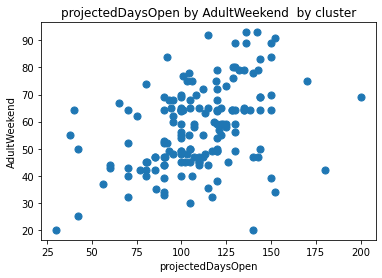

In [23]:
plt.scatter(df['projectedDaysOpen'], df['AdultWeekend'], s=50, cmap='viridis')
plt.xlabel('projectedDaysOpen')
plt.ylabel('AdultWeekend')
plt.title('projectedDaysOpen by AdultWeekend  by cluster')
plt.savefig('fig1.png',bbox_inches='tight')

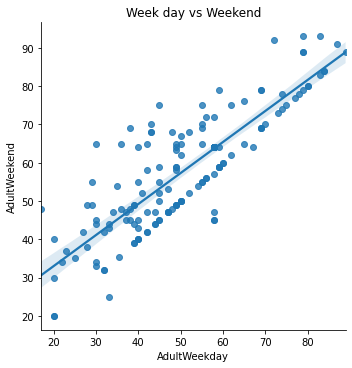

In [24]:
sns.lmplot(x='AdultWeekday',y='AdultWeekend', data=df)
plt.xlabel('AdultWeekday')
plt.ylabel('AdultWeekend')
plt.title('Week day vs Weekend')
plt.savefig('fig2.png',bbox_inches='tight')

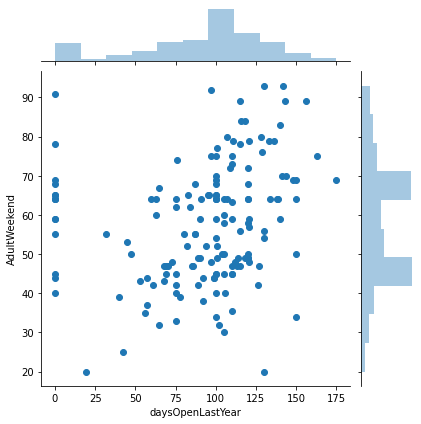

In [25]:
sns.jointplot(x='daysOpenLastYear',y='AdultWeekend',data=df,kind='scatter')
plt.savefig('fig3.png',bbox_inches='tight')

In [26]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'regression_model_adultweekend.joblib') 

['regression_model_adultweekend.joblib']

In [27]:
dfc['Mean Absolute Error'] = mean_absolute_error(y_test,y_pred)

In [28]:
dfc['Explained Variance Score'] = explained_variance_score(y_test,y_pred)

In [29]:
dfc

,Coefficient,Mean Absolute Error,Explained Variance Score
vertical_drop,2.898365e+00,6.183673,0.755285
trams,1.332268e-15,6.183673,0.755285
fastEight,4.440892e-16,6.183673,0.755285
fastSixes,1.332268e-15,6.183673,0.755285
fastQuads,2.331171e-01,6.183673,0.755285
quad,1.352850e+00,6.183673,0.755285
triple,1.142012e+00,6.183673,0.755285
double,2.196375e-01,6.183673,0.755285
surface,6.416887e-02,6.183673,0.755285
total_chairs,6.596279e-01,6.183673,0.755285
